<a href="https://colab.research.google.com/github/seon-pegado/Sem-V/blob/main/DMW/EXP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

# IRIS FLOWER CLASSIFICATION :

Decision Tree Accuracy = 1.0
Naive Bayes Accuracy = 1.0


<BarContainer object of 2 artists>

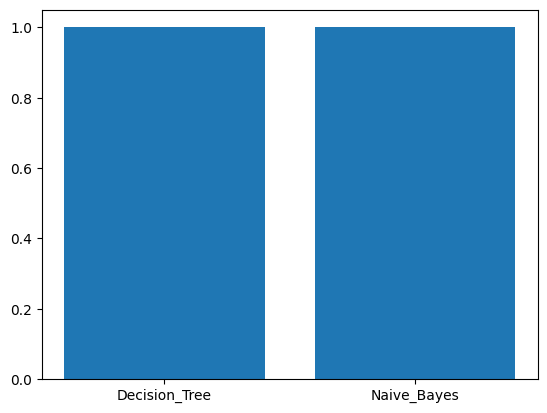

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

#Split the dataframe in X and y
X = iris.drop('species', axis = 1)
y  = iris['species']

# Unique vlaues in  the label
np.unique(iris['species'])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

# Decision Tree
clf1_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf1_DT.fit(X_train, y_train)
DT_acc1 = clf1_DT.score(X_test, y_test)
print(f'Decision Tree Accuracy = {DT_acc1}')

# Naive Bayes
clf1_NB = GaussianNB()
clf1_NB.fit(X_train, y_train)
NB_acc1 = clf1_NB.score(X_test, y_test)
print(f'Naive Bayes Accuracy = {NB_acc1}')

# Bar plot
plt.bar(['Decision_Tree', 'Naive_Bayes'], [DT_acc1, NB_acc1]);

# GLASS CLASSIFICATION :

Decision Tree Accuracy = 0.7674418604651163
Naive Bayes Accuracy = 0.5581395348837209


<BarContainer object of 2 artists>

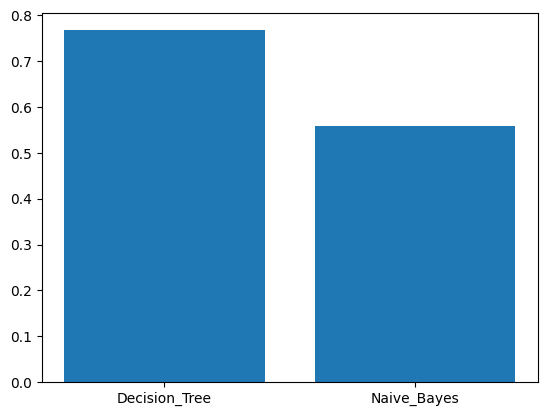

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Data/glass.csv')
df2.head()

# Split the dataframe in X and y
X = df2.drop('Type', axis = 1)
y = df2['Type']

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Decision Tree
clf2_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf2_DT.fit(X_train, y_train)
DT_acc2 = clf2_DT.score(X_test, y_test)
print(f'Decision Tree Accuracy = {DT_acc2}')

# Naive Bayes
clf2_NB = GaussianNB()
clf2_NB.fit(X_train, y_train)
NB_acc2 = clf2_NB.score(X_test, y_test)
print(f'Naive Bayes Accuracy = {NB_acc2}')

# Bar Plot
plt.bar(['Decision_Tree', 'Naive_Bayes'], [DT_acc2, NB_acc2])

# Predictive Maintenance


Decision Tree Accuracy = 0.9905
Naive Bayes Accuracy = 0.992


<BarContainer object of 2 artists>

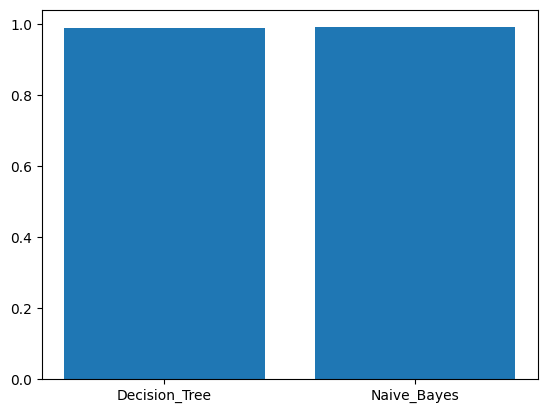

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Data/predictive_maintenance.csv')
df3.head()

X = df3.drop(['UDI', 'Product ID', 'Type', 'Failure Type'], axis = 1)
y = df3['Failure Type']

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2)

clf3_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf3_DT.fit(X_train, y_train)
DT_acc3 = clf3_DT.score(X_test, y_test)
print(f'Decision Tree Accuracy = {DT_acc3}')

# Naive Bayes
clf3_NB = GaussianNB()
clf3_NB.fit(X_train, y_train)
NB_acc3 = clf3_NB.score(X_test, y_test)
print(f'Naive Bayes Accuracy = {NB_acc3}')

# Bar Plot
plt.bar(['Decision_Tree', 'Naive_Bayes'], [DT_acc3, NB_acc3])

# Star  Classification :

Decision Tree Accuracy = 0.9654
Naive Bayes Accuracy = 0.6012


<BarContainer object of 2 artists>

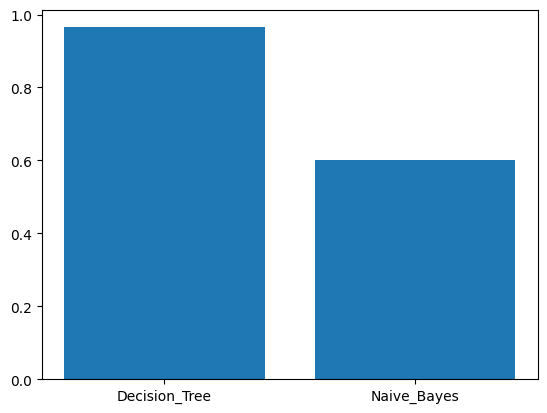

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/Data/star_classification.csv')
X = df4.drop('class', axis = 1)
y = df4['class']

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2)

clf4_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf4_DT.fit(X_train, y_train)
DT_acc4 = clf4_DT.score(X_test, y_test)
print(f'Decision Tree Accuracy = {DT_acc4}')

# Naive Bayes
clf4_NB = GaussianNB()
clf4_NB.fit(X_train, y_train)
NB_acc4 = clf4_NB.score(X_test, y_test)
print(f'Naive Bayes Accuracy = {NB_acc4}')

# Bar Plot
plt.bar(['Decision_Tree', 'Naive_Bayes'], [DT_acc4, NB_acc4])

# Dermatology:

Decision Tree Accuracy = 0.972972972972973
Naive Bayes Accuracy = 0.8783783783783784


<BarContainer object of 2 artists>

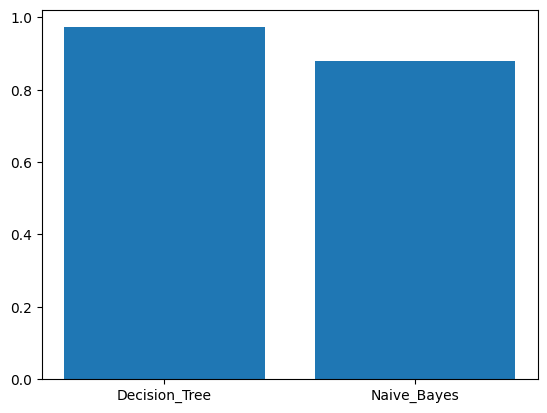

In [ ]:
df5 = pd.read_csv('/content/drive/MyDrive/Data/dermatology_database_1.csv')
X = df5.drop(['class','age'], axis = 1)
y = df5['class']

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2)

clf5_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf5_DT.fit(X_train, y_train)
DT_acc5 = clf5_DT.score(X_test, y_test)
print(f'Decision Tree Accuracy = {DT_acc5}')

# Naive Bayes
clf5_NB = GaussianNB()
clf5_NB.fit(X_train, y_train)
NB_acc5 = clf5_NB.score(X_test, y_test)
print(f'Naive Bayes Accuracy = {NB_acc5}')

# Bar Plot
plt.bar(['Decision_Tree', 'Naive_Bayes'], [DT_acc5, NB_acc5])

In [ ]:
df5.dtypes


erythema                                int64
scaling                                 int64
definite_borders                        int64
itching                                 int64
koebner_phenomenon                      int64
polygonal_papules                       int64
follicular_papules                      int64
oral_mucosal_involvement                int64
knee_and_elbow_involvement              int64
scalp_involvement                       int64
family_history                          int64
melanin_incontinence                    int64
eosinophils_infiltrate                  int64
PNL_infiltrate                          int64
fibrosis_papillary_dermis               int64
exocytosis                              int64
acanthosis                              int64
hyperkeratosis                          int64
parakeratosis                           int64
clubbing_rete_ridges                    int64
elongation_rete_ridges                  int64
thinning_suprapapillary_epidermis 